In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("sayanf/flickr8k")

print("Path to dataset files:", path)

100%|██████████| 1.04G/1.04G [00:19<00:00, 56.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sayanf/flickr8k/versions/5


In [ ]:
!mv  /root/.cache/kagglehub/datasets/sayanf/flickr8k/versions/5/ /content/

In [ ]:
!dir

5  sample_data


In [ ]:
def readTextFile(file):
  with open(file) as f:
    captions = f.read()
  return captions



In [ ]:
!ls 5/Flickr8k_text

CrowdFlowerAnnotations.txt  Flickr8k.lemma.token.txt  Flickr_8k.trainImages.txt
ExpertAnnotations.txt	    Flickr_8k.testImages.txt  readme.txt
Flickr_8k.devImages.txt     Flickr8k.token.txt


In [ ]:
#large file so we split
captions = readTextFile('5/Flickr8k_text/Flickr8k.token.txt')
captions = captions.split("\n")[:-1] #last line is empty

In [ ]:
captions[-2]

'997722733_0cb5439472.jpg#3\tA rock climber in a red shirt .'

In [ ]:
captions[0].split('\t')

['1000268201_693b08cb0e.jpg#0',
 'A child in a pink dress is climbing up a set of stairs in an entry way .']

In [ ]:
captions[4].split('\t')

['1000268201_693b08cb0e.jpg#4',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
#Dictionary to map image with list of captions
descriptions = {}
for x in captions:
  image, caption = x.split('\t')
  image = image.split(".")[0]
  if image not in descriptions:
    descriptions[image] = []
  descriptions[image].append(caption)

# Data Cleaning

In [ ]:
import regex as re

In [ ]:
def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()
  sentence = [s for s in sentence if len(s) > 1]
  sentence = " ".join(sentence)
  return sentence

In [ ]:
clean_text("A cat is fucking over house # 5")

'cat is fucking over house'

In [ ]:
#Clean captions
for key,caption_list in descriptions.items():
  for i in range(len(caption_list)):
    caption_list[i] = clean_text(caption_list[i])

In [ ]:
# Write the data to text file
with open("descriptions_1.txt","w") as f:
    f.write(str(descriptions))

# Vocab

In [ ]:
import json

In [ ]:
descriptions = None
with open("descriptions_1.txt",'r') as f:
  descriptions = f.read()
json_acceptable_string = descriptions.replace("'","\"")
descriptions = json.loads(json_acceptable_string)

In [ ]:
print(type(descriptions))

<class 'dict'>


In [ ]:
# Vocab

vocab = set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]#keep updating vocab , which is a set

print("Vocab Size : %d"% len(vocab))

Vocab Size : 8424


In [ ]:
#total no of words across sentences
total_words = []

for key in descriptions.keys():
  [total_words.append(i) for des in descriptions[key] for i in des.split()]

print("Total Words %d"% len(total_words))


Total Words 373837


In [ ]:
import collections
counter = collections.Counter(total_words)
freq_cnt = dict(counter)
print(len(freq_cnt.keys()))

8424


In [ ]:
freq_cnt

{'child': 1545,
 'in': 18987,
 'pink': 739,
 'dress': 348,
 'is': 9345,
 'climbing': 507,
 'up': 1302,
 'set': 109,
 'of': 6723,
 'stairs': 109,
 'an': 2432,
 'entry': 1,
 'way': 53,
 'girl': 3328,
 'going': 149,
 'into': 1074,
 'wooden': 284,
 'building': 511,
 'little': 1768,
 'playhouse': 6,
 'the': 18420,
 'to': 3176,
 'her': 1178,
 'cabin': 4,
 'black': 3848,
 'dog': 8138,
 'and': 8863,
 'spotted': 38,
 'are': 3505,
 'fighting': 133,
 'tri': 14,
 'colored': 221,
 'playing': 2008,
 'with': 7765,
 'each': 430,
 'other': 773,
 'on': 10746,
 'road': 398,
 'white': 3959,
 'brown': 2578,
 'spots': 29,
 'staring': 57,
 'at': 2916,
 'street': 944,
 'two': 5643,
 'dogs': 2125,
 'different': 46,
 'breeds': 5,
 'looking': 744,
 'pavement': 48,
 'moving': 41,
 'toward': 146,
 'covered': 372,
 'paint': 62,
 'sits': 577,
 'front': 1386,
 'painted': 64,
 'rainbow': 22,
 'hands': 246,
 'bowl': 30,
 'sitting': 1368,
 'large': 1237,
 'small': 1278,
 'grass': 1622,
 'plays': 526,
 'fingerpaints': 3,

In [ ]:
# Sort this dictionary according to the freq count reduce frequency for keeping the most used words
sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])

# Filter
threshold = 10
sorted_freq_cnt  = [x for x in sorted_freq_cnt if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_cnt]

In [ ]:
!dir 5/Flickr8k_text

CrowdFlowerAnnotations.txt  Flickr8k.lemma.token.txt  Flickr_8k.trainImages.txt
ExpertAnnotations.txt	    Flickr_8k.testImages.txt  readme.txt
Flickr_8k.devImages.txt     Flickr8k.token.txt


In [ ]:
train_file_data = readTextFile("5/Flickr8k_text/Flickr_8k.trainImages.txt")
test_file_data = readTextFile("5/Flickr8k_text/Flickr_8k.testImages.txt")

In [ ]:
train = [row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
test = [row.split(".")[0] for row in test_file_data.split("\n")[:-1]]

In [ ]:
train[:5]


['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [ ]:
#adding start and end token
train_descriptions = {}
for img_id in train:
  train_descriptions[img_id] = []
  for cap in descriptions[img_id]:
    cap_to_append = "startseq " + cap + " endseq"
    train_descriptions[img_id].append(cap_to_append)

In [ ]:
train_descriptions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

# Image Feature extraction

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [ ]:
model = ResNet50(weights = "imagenet",input_shape = (224,224,3))
#model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_new = Model(model.input,model.layers[-2].output)

In [ ]:
import numpy as np

In [ ]:
def preprocess_img(img):
  img = load_img(img,target_size=(224,224,3))
  img = img_to_array(img)
  img = np.expand_dims(img,axis = 0)
  img = preprocess_input(img)
  return img

In [ ]:
IMG_PATH ='/content/5/Flickr8k_Dataset/'

In [ ]:
import matplotlib.pyplot as plt

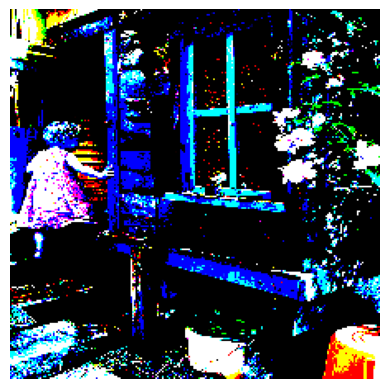

In [ ]:
img = preprocess_img(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.axis("off")
plt.show()

In [ ]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img,verbose=0)

    feature_vector = feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector

In [ ]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

array([0.06536549, 0.1678271 , 0.32518435, ..., 0.05111533, 0.32817906,
       1.0043344 ], dtype=float32)

In [ ]:
from time import time
start = time()
encoding_train = {}
#image_id -->feature_vector extracted from Resnet Image

for ix,img_id in enumerate(train):
    img_path = IMG_PATH+"/"+img_id+".jpg"
    encoding_train[img_id] = encode_image(img_path)

    if ix%100==0:
        print("Encoding in Progress Time step %d "%ix)

end_t = time()
print("Total Time Taken :",end_t-start)

Encoding in Progress Time step 0 
Encoding in Progress Time step 100 
Encoding in Progress Time step 200 
Encoding in Progress Time step 300 
Encoding in Progress Time step 400 
Encoding in Progress Time step 500 
Encoding in Progress Time step 600 
Encoding in Progress Time step 700 
Encoding in Progress Time step 800 
Encoding in Progress Time step 900 
Encoding in Progress Time step 1000 
Encoding in Progress Time step 1100 
Encoding in Progress Time step 1200 
Encoding in Progress Time step 1300 
Encoding in Progress Time step 1400 
Encoding in Progress Time step 1500 
Encoding in Progress Time step 1600 
Encoding in Progress Time step 1700 
Encoding in Progress Time step 1800 
Encoding in Progress Time step 1900 
Encoding in Progress Time step 2000 
Encoding in Progress Time step 2100 
Encoding in Progress Time step 2200 
Encoding in Progress Time step 2300 
Encoding in Progress Time step 2400 
Encoding in Progress Time step 2500 
Encoding in Progress Time step 2600 
Encoding in P

In [ ]:
!mkdir saved

In [ ]:
import pickle

In [ ]:
# Store everything to the disk
with open("saved/encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [ ]:
start = time()
encoding_test = {}
#image_id -->feature_vector extracted from Resnet Image

for ix,img_id in enumerate(test):
    img_path = IMG_PATH+"/"+img_id+".jpg"
    encoding_test[img_id] = encode_image(img_path)


    if ix%100==0:
        print("Test Encoding in Progress Time step %d "%ix)

end_t = time()
print("Total Time Taken(test) :",end_t-start)

Test Encoding in Progress Time step 0 
Test Encoding in Progress Time step 100 
Test Encoding in Progress Time step 200 
Test Encoding in Progress Time step 300 
Test Encoding in Progress Time step 400 
Test Encoding in Progress Time step 500 
Test Encoding in Progress Time step 600 
Test Encoding in Progress Time step 700 
Test Encoding in Progress Time step 800 
Test Encoding in Progress Time step 900 
Total Time Taken(test) : 355.45560336112976


# Data Preprocessing for Captions


In [ ]:
#create both way mapping
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word

In [ ]:
#eos and sos
idx_to_word[1846] = 'startseq'
word_to_idx['startseq'] = 1846

idx_to_word[1847] = 'endseq'
word_to_idx['endseq'] = 1847

vocab_size = len(word_to_idx) + 1
print("Vocab Size",vocab_size)

Vocab Size 1848


In [ ]:
max_len = 0 #getting max length
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len = max(max_len,len(cap.split()))

print(max_len)

35


## Data Loader / Genearator


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def data_generator(train_descriptions, encoding_train, word_to_idx, max_len, batch_size, vocab_size):
    X1, X2, y = [], [], []

    while True:
        for key, desc_list in train_descriptions.items():
            photo = encoding_train[key]

            for desc in desc_list:
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]

                for i in range(1, len(seq)):
                    xi = seq[:i]
                    yi = seq[i]

                    # Pad input sequence and convert output to one-hot encoding
                    xi = pad_sequences([xi], maxlen=max_len, value=0, padding='post')[0]
                    yi = to_categorical([yi], num_classes=vocab_size)[0]

                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)

                    # Yield a batch when the batch size is reached
                    if len(X1) == batch_size:
                        yield ([np.array(X1), np.array(X2)], np.array(y))
                        X1, X2, y = [], [], []

        # Handle the last batch if it's smaller than batch_size
        if len(X1) > 0:
            yield ([np.array(X1), np.array(X2)], np.array(y))
            X1, X2, y = [], [], []

In [ ]:
from keras.layers import add
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

# Word Embedding


In [ ]:
# prompt: download glove 6B 50d

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-02-19 20:32:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-19 20:32:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-19 20:32:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
f = open("./glove.6B.50d.txt",encoding='utf8')

In [ ]:
embedding_index = {}
#making embedding mapping
for line in f:
    values = line.split()

    word = values[0]
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word] = word_embedding

f.close()

In [ ]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [ ]:
#making embedding matrix
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        embedding_vector = embedding_index.get(word)

        if embedding_vector is not None:
            matrix[idx] = embedding_vector

    return matrix

embedding_matrix = get_embedding_matrix()
embedding_matrix.shape


(1848, 50)

# Model Architecture


In [ ]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,Dropout,Embedding,LSTM
from tensorflow.keras.layers import add

In [ ]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [ ]:
# Captions as Input
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 35, 50)         │         92,400 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 2048)           │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 35, 50)         │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 35)             │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        524,544 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 256)            │        314,368 │ dropout_3[0][0],       │
│                           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256)            │              0 │ dense_3[0][0],         │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 256)            │         65,792 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1848)           │        474,936 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,472,040 (5.62 MB)

 Trainable params: 1,472,040 (5.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Important Thing - Embedding Layer
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

## Training model


In [ ]:
vocab_size = len(word_to_idx) + 1  # Includes padding token at 0

In [ ]:
epochs = 20
batch_size = 3
steps = len(train_descriptions)//20

In [ ]:
total_samples = sum(len(desc.split()) - 1 for key in train_descriptions for desc in train_descriptions[key])
steps_per_epoch = total_samples // batch_size

In [ ]:
def data_generator(train_descriptions, encoding_train, word_to_idx, max_len, batch_size, vocab_size):
    X1, X2, y = [], [], []

    while True:
        for key, desc_list in train_descriptions.items():
            photo = encoding_train[key]

            for desc in desc_list:
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]

                for i in range(1, len(seq)):
                    xi = seq[:i]
                    yi = seq[i]

                    # Pad input sequence and convert output to one-hot encoding
                    xi = pad_sequences([xi], maxlen=max_len, value=0, padding='post')[0]
                    yi = to_categorical([yi], num_classes=vocab_size)[0]

                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)

                    # Yield a batch when the batch size is reached
                    if len(X1) == batch_size:
                        yield (np.array(X1), np.array(X2), np.array(y))  # Yield as a tuple of arrays
                        X1, X2, y = [], [], []

        # Handle the last batch if it's smaller than batch_size
        if len(X1) > 0:
            yield (np.array(X1), np.array(X2), np.array(y))  # Yield as a tuple of arrays
            X1, X2, y = [], [], []

In [ ]:
import tensorflow as tf

In [ ]:
# Define the output signature
output_signature = (
    tf.TensorSpec(shape=(None, encoding_train[key].shape[0]), dtype=tf.float32),  # X1
    tf.TensorSpec(shape=(None, max_len), dtype=tf.int32),                         # X2
    tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)                     # y
)

# Create the dataset
dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(train_descriptions, encoding_train, word_to_idx, max_len, batch_size, vocab_size),
    output_signature=output_signature
)

# Batch the dataset (if not already batched in the generator)
dataset = dataset.batch(batch_size)

# Prefetch for better performance
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Train the model
model.fit(dataset, epochs=10, steps_per_epoch=len(train_descriptions) // batch_size)

Epoch 1/10


ValueError: Layer "functional_2" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, None, 2048) dtype=float32>]

In [ ]:
encoding_train['2513260012_03d33305cf']

array([0.34708   , 0.5115914 , 0.08728845, ..., 1.1897297 , 0.0404386 ,
       0.15271069], dtype=float32)

In [ ]:
train()

NameError: name 'dataset' is not defined

In [ ]:
model = load_model('./model_weights/model_9.h5')